* Feature Tanpa Scaling.
* Target Tanpa Scaling.

## Library

In [1]:
# import necessary module

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import concatenate
from keras.layers import Dense, Input, Dropout

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## Model Biasa

In [2]:
def model(n_input, n_target):
    """
    Fungsi untuk membuat model
    
    arguments:
        n_input = jumlah feature dari data input
        n_outut = jumlah target
        
    return:
        model
    """
    # initializer 
    initializer = tf.keras.initializers.GlorotUniform(seed=None)
    mse = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    aktivasi = "relu"

    # input layer
    visible = Input(shape=(n_input))
    
    # branch 1
    x1 = Dense(100, kernel_initializer = initializer, activation = aktivasi)(visible)
    x1 = Dense(75, kernel_initializer = initializer, activation = aktivasi)(x1)
    x1 = Dense(50, kernel_initializer = initializer, activation = aktivasi)(x1)
    x1 = Dense(n_target, kernel_initializer = initializer, activation = "tanh")(x1)    

    # model
    model = Model(inputs = visible, 
                  outputs = x1)
    
    #compile model
    model.compile(loss = mse,
                  optimizer = 'nadam')
    
    return model

## Data

In [3]:
# input data

feature = pd.read_csv("coef_fourier_kolom.csv")
feature.sample(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
299,-2.564005,-2.974074,-2.449338,-2.563678,-2.571632,-2.661665,-2.746351,-2.331729,-2.401345,-2.434173,...,-2.686741,-2.958202,-2.2606,-2.341488,-2.777364,-2.575247,-2.307158,-2.289519,-2.530523,-1.819348
1567,-2.563005,-2.973074,-2.443338,-2.557678,-2.536632,-2.626665,-2.534351,-2.119729,-1.133345,-1.166173,...,-2.685741,-2.957202,-2.2546,-2.335488,-2.742364,-2.540247,-2.095158,-2.077519,-1.262523,-0.551348
3296,-2.561005,-2.971074,-2.435338,-2.549678,-2.488632,-2.578665,-2.246351,-1.831729,0.595655,0.562827,...,-2.683741,-2.955202,-2.2466,-2.327488,-2.694364,-2.492247,-1.807158,-1.789519,0.466477,1.177652
4234,-2.561005,-2.971074,-2.431338,-2.545678,-2.462632,-2.552665,-2.090351,-1.675729,1.533655,1.500827,...,-2.683741,-2.955202,-2.2426,-2.323488,-2.668364,-2.466247,-1.651158,-1.633519,1.404477,2.115652
2375,-2.562005,-2.972074,-2.440338,-2.554678,-2.514632,-2.604665,-2.400351,-1.985729,-0.325345,-0.358173,...,-2.684741,-2.956202,-2.2516,-2.332488,-2.720364,-2.518247,-1.961158,-1.943519,-0.454523,0.256652


In [4]:
# target data

target = pd.read_csv("coef_ekspansi.csv")
target.sample(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
3087,0.020048,0.037265,0.049329,0.055424,0.055588,0.050375,0.041036,0.029212,0.016821,0.005729,...,0.034217,0.063591,0.084156,0.094539,0.094817,0.085938,0.070007,0.049806,0.028595,0.009600
1207,-0.015843,-0.029645,-0.040811,-0.047856,-0.051404,-0.050910,-0.047152,-0.040459,-0.031876,-0.021693,...,-0.027321,-0.051157,-0.070444,-0.082594,-0.088689,-0.087844,-0.081386,-0.069886,-0.055103,-0.037444
1911,-0.016626,-0.031568,-0.043217,-0.050159,-0.052926,-0.051214,-0.045945,-0.037794,-0.028047,-0.017378,...,-0.028549,-0.054236,-0.074264,-0.086184,-0.090916,-0.087982,-0.078951,-0.064980,-0.048239,-0.029822
4929,-0.031169,-0.049488,-0.058296,-0.059683,-0.051953,-0.038063,-0.019691,-0.000340,0.016617,0.024504,...,-0.053240,-0.084382,-0.099222,-0.101535,-0.088455,-0.064872,-0.033544,-0.000364,0.028791,0.042198
2909,-0.019292,-0.036151,-0.048220,-0.054532,-0.055237,-0.050712,-0.042150,-0.031009,-0.019086,-0.007989,...,-0.032950,-0.061747,-0.082346,-0.093110,-0.094309,-0.086595,-0.071980,-0.052939,-0.032524,-0.013498


## Data Splitting

In [5]:
instances_1, feature_dim = feature.shape
instances_2, target_dim = target.shape

In [6]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 7)

## Training

In [7]:
# model 

model = model(feature_dim, target_dim)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 75)                7575      
                                                                 
 dense_2 (Dense)             (None, 50)                3800      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
Total params: 26,575
Trainable params: 26,575
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training 
history = model.fit(x = X_train, 
           y = y_train, 
           batch_size = 8, 
           shuffle = True, 
           validation_data = (X_test, y_test), 
           epochs = 250)

Epoch 1/250
540/540 [==============================] - 2s 2ms/step - loss: 0.0113 - val_loss: 0.0092
Epoch 2/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 3/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 4/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 5/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 6/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 7/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 8/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 9/250
540/540 [==============================] - 1s 1ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 10/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_lo

540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 82/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 83/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 84/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 85/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 86/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 87/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 88/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 89/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 90/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 

Epoch 161/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 162/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 163/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 164/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 165/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 166/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 167/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 168/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 169/250
540/540 [==============================] - 1s 2ms/step - loss: 0.0095 - val_loss: 0.0093
Epoch 170/250
540/540 [==============================] - 1s 3ms/step - lo

## Visualisasi

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(loss) + 1)
plt.figure(figsize = (13, 8))
plt.style.use("seaborn")

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Prediction

In [ ]:
# prediksi
prediction = model.predict(X_test)

In [ ]:
prediksi = prediction.flatten()
real = y_test.to_numpy().flatten()

In [ ]:
df = {"predict": prediksi, "real": real}
pd.DataFrame(df)

In [ ]:
from sklearn.metrics import r2_score
r2_score(real, prediksi)

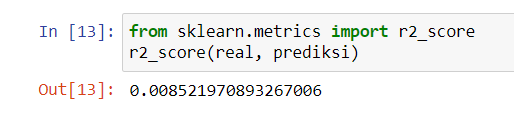

# ------------------------------------------------------------------------------------------------